<a href="https://colab.research.google.com/github/MengOonLee/BertelsmannAITrack/blob/Lesson05/LoadingImageData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Clone the repo.
!git clone https://github.com/udacity/deep-learning-v2-pytorch.git

# Change the working directory to the repo root.
%cd ./deep-learning-v2-pytorch/intro-to-pytorch

# Add the repo root to the Python path.
import sys, os
sys.path.append(os.getcwd())

Cloning into 'deep-learning-v2-pytorch'...
remote: Enumerating objects: 1078, done.
remote: Total 1078 (delta 0), reused 0 (delta 0), pack-reused 1078
Receiving objects: 100% (1078/1078), 137.90 MiB | 28.49 MiB/s, done.
Resolving deltas: 100% (484/484), done.
/content/deep-learning-v2-pytorch/intro-to-pytorch


In [0]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import helper
import fc_model

In [0]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.FashionMNIST("~/.pytorch/F_MNIST_data/", download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST("~/.pytorch/F_MNIST_data/", download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

  0%|          | 40960/26421880 [00:00<01:07, 391290.18it/s]

26427392it [00:00, 80564448.55it/s]                            


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


32768it [00:00, 517072.68it/s]
  5%|▍         | 212992/4422102 [00:00<00:02, 1964791.13it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


4423680it [00:00, 24824141.88it/s]                           
8192it [00:00, 187449.81it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...
Done!


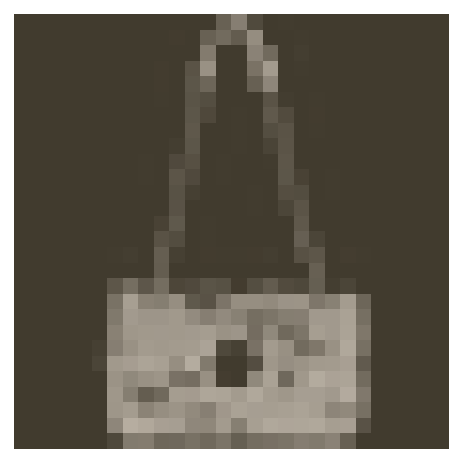

In [0]:
image, label = next(iter(trainloader))
helper.imshow(image[0, :])

In [0]:
# Create the network, define the criterion and optimizer
model = fc_model.Network(784, 10, [512, 256, 128])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [0]:
fc_model.train(model, trainloader, testloader, criterion, optimizer, epochs=2)

Epoch: 1/2..  Training Loss: 1.703..  Test Loss: 0.982..  Test Accuracy: 0.608
Epoch: 1/2..  Training Loss: 1.087..  Test Loss: 0.770..  Test Accuracy: 0.719
Epoch: 1/2..  Training Loss: 0.926..  Test Loss: 0.690..  Test Accuracy: 0.739
Epoch: 1/2..  Training Loss: 0.786..  Test Loss: 0.645..  Test Accuracy: 0.758
Epoch: 1/2..  Training Loss: 0.778..  Test Loss: 0.630..  Test Accuracy: 0.749
Epoch: 1/2..  Training Loss: 0.730..  Test Loss: 0.595..  Test Accuracy: 0.784
Epoch: 1/2..  Training Loss: 0.684..  Test Loss: 0.572..  Test Accuracy: 0.782
Epoch: 1/2..  Training Loss: 0.660..  Test Loss: 0.572..  Test Accuracy: 0.786
Epoch: 1/2..  Training Loss: 0.682..  Test Loss: 0.566..  Test Accuracy: 0.793
Epoch: 1/2..  Training Loss: 0.657..  Test Loss: 0.549..  Test Accuracy: 0.799
Epoch: 1/2..  Training Loss: 0.631..  Test Loss: 0.532..  Test Accuracy: 0.802
Epoch: 1/2..  Training Loss: 0.624..  Test Loss: 0.513..  Test Accuracy: 0.812
Epoch: 1/2..  Training Loss: 0.637..  Test Loss: 0.5

In [0]:
# PyTorch networks are stored in a model's state_dict
print("Our model: \n\n", model, "\n")
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
) 

The state dict keys: 

 odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [0]:
# Save the state dict to a file "checkpoint.pth"
torch.save(model.state_dict(), "checkpoint.pth")

In [0]:
# Load the state dict
state_dict = torch.load("checkpoint.pth")
print(state_dict.keys())

odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [0]:
# Load the state dict into the network
model.load_state_dict(state_dict)

<All keys matched successfully>

In [0]:
# Model with different architecture will fail
model = fc_model.Network(784, 10, [400, 200, 100])
model.load_state_dict(state_dict)

RuntimeError: ignored

In [0]:
# Information about model architecture needs to be saved in the checkpoint, along with the state dict
checkpoint = {"input_size": 784,
              "output_size": 10,
              "hidden_layers": [each.out_features for each in model.hidden_layers],
              "state_dict": model.state_dict()}

torch.save(checkpoint, "checkpoint.pth")

In [0]:
# Write a function to load checkpoints
def load_checkpoint(filepath):
  checkpoint = torch.load(filepath)
  model = fc_model.Network(
      checkpoint["input_size"],
      checkpoint["output_size"],
      checkpoint["hidden_layers"])
  model.load_state_dict(checkpoint["state_dict"])
  return model

In [0]:
# The checkpoint has all the necessary information to rebuild the trained model
model = load_checkpoint("checkpoint.pth")
print(model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): Linear(in_features=400, out_features=200, bias=True)
    (2): Linear(in_features=200, out_features=100, bias=True)
  )
  (output): Linear(in_features=100, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
